In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
lines = pd.read_csv('../data/All-seasons.csv')

In [4]:
lines.shape

(70896, 4)

In [5]:
lines.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [6]:
seasons = set(lines.loc[:,'Season'])
seasons

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Season'}

In [7]:
from collections import Counter

counts = Counter(lines.Character)
len(counts)

3950

In [8]:
most_common = counts.most_common(50)
most_common

[('Cartman', 9774),
 ('Stan', 7680),
 ('Kyle', 7099),
 ('Butters', 2602),
 ('Randy', 2467),
 ('Mr. Garrison', 1002),
 ('Chef', 917),
 ('Kenny', 881),
 ('Sharon', 862),
 ('Mr. Mackey', 633),
 ('Gerald', 626),
 ('Jimmy', 597),
 ('Wendy', 585),
 ('Liane', 582),
 ('Sheila', 566),
 ('Jimbo', 556),
 ('Announcer', 407),
 ('Stephen', 357),
 ('Craig', 326),
 ('Clyde', 317),
 ('Jesus', 312),
 ('Linda', 290),
 ('Principal Victoria', 289),
 ('Mrs. Garrison', 282),
 ('Terrance', 282),
 ('Token', 278),
 ('Timmy', 263),
 ('Mayor', 245),
 ('Tweek', 233),
 ('Phillip', 222),
 ('Bebe', 221),
 ('Man', 211),
 ('Woman', 204),
 ('Satan', 203),
 ('Ike', 200),
 ('Michael', 198),
 ('Shelly', 196),
 ('Chris', 193),
 ('Scott', 192),
 ('Pip', 189),
 ('Officer Barbrady', 174),
 ('Ms. Choksondik', 155),
 ('Narrator', 151),
 ('Dr. Doctor', 151),
 ('Barbrady', 150),
 ('Stuart', 148),
 ('Mr. Hankey', 148),
 ('Mephesto', 141),
 ('Doctor', 140),
 ('Kids', 137)]

Plotting characters with the most lines:

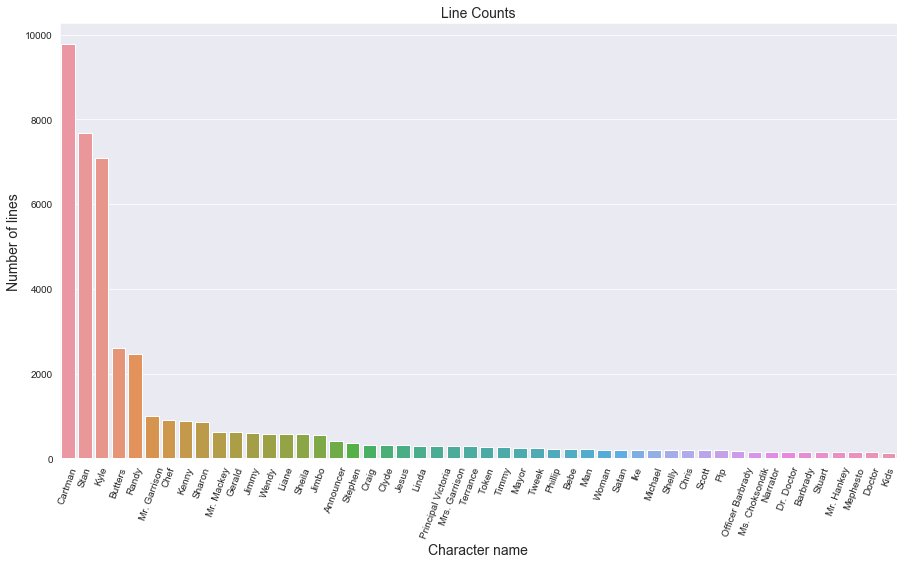

In [9]:
names = [tup[0] for tup in most_common]
counts = [tup[1] for tup in most_common]

fig = plt.subplots(figsize=(15,8))
_ = sns.barplot(names, counts)
_ = plt.xlabel('Character name', fontsize=14)
_ = plt.ylabel('Number of lines', fontsize=14)
_ = plt.title('Line Counts', fontsize=14)
_ = plt.xticks(rotation=70)

Creating the word corpus and removing `\n` pattern from the end of each line:

In [11]:
import re

corpus = lines.Line.tolist()

for line in range(len(corpus)):
    corpus[line] = re.sub('\\n', '', corpus[line].rstrip())
    
corpus[:10]

['You guys, you guys! Chef is going away.',
 'Going away? For how long?',
 'Forever.',
 "I'm sorry boys.",
 "Chef said he's been bored, so he joining a group called the Super Adventure Club.",
 'Wow!',
 'Chef?? What kind of questions do you think adventuring around the world is gonna answer?!',
 "What's the meaning of life? Why are we here?",
 "I hope you're making the right choice.",
 "I'm gonna miss him.  I'm gonna miss Chef and I...and I don't know how to tell him!"]

<b>CountVectorizer and Naive Bayes</b><br>
Set up the vectors with `CountVectorizer` and establish the *X* and *y* variables.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
y = lines.Character

In [29]:
print(vectorizer.get_feature_names()[5100:5111])

['crammed', 'cramp', 'cramps', 'crampy', 'cramsonite', 'cranberries', 'crane', 'crank', 'crankshaft', 'cranky', 'crap']


In [35]:
print('Number of lines: ', len(corpus))
print('Number of tokens: ', len(vectorizer.get_feature_names()))

Number of lines:  70896
Number of tokens:  25528


Train-test splits

In [37]:
from sklearn.model_selection import train_test_split

state = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

Run naive bayes with the data splits

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
train_pred = nb_clf.predict(X_train)
test_pred = nb_clf.predict(X_test)

print('Training accuracy is: ', accuracy_score(y_train, train_pred))
print('Test accuracy is: ', accuracy_score(y_test, test_pred))

Training accuracy is:  0.23956217558113294
Test accuracy is:  0.1843827578424735
